###TensorFlow2 Implementation for Towards End-to-End Unified Scene Text Detection and Layout Analysis

Github :- https://github.com/tensorflow/models/tree/master/official/projects/unified_detector

Paper :- https://arxiv.org/pdf/2203.15143.pdf



Download the checkpoint from https://storage.cloud.google.com/tf_model_garden/vision/unified_detector/unified_detector_ckpt.tgz
If you download the checkpoint as instructed above, you will obtain two files:
<some-directory>/ckpt.index and <some-directory>/ckpt.data-00000-of-00001.
You need to set --ckpt_path=<some-directory>/ckpt, i.e. removing the suffix.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tarfile

# Specify the path to the uploaded .tgz file
tgz_file_path = "/content/drive/MyDrive/vision_unified_detector_unified_detector_ckpt.tgz"

# Specify the directory where you want to extract the files
extraction_path = "/content/ckpt"

# Extract the .tgz archive
with tarfile.open(tgz_file_path, 'r:gz') as tar_ref:
    tar_ref.extractall(extraction_path)


Clone the TensorFlow Models project locally

In [3]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 87502, done.
remote: Counting objects: 100% (1256/1256), done.
remote: Compressing objects: 100% (589/589), done.
remote: Total 87502 (delta 759), reused 1119 (delta 655), pack-reused 86246
Receiving objects: 100% (87502/87502), 599.38 MiB | 28.06 MiB/s, done.
Resolving deltas: 100% (62618/62618), done.


Install the requirements of TensorFlow Models and this repo:

In [ ]:
%cd models
!pip3 install -r official/requirements.txt
!pip3 install -r official/projects/unified_detector/requirements.txt

Compile the protos

If `protoc` is not installed, please follow: https://grpc.io/docs/protoc-installation/

In [5]:
!export PYTHONPATH=${PYTHONPATH}:${PWD}/research/
%cd research/object_detection/
!protoc protos/string_int_label_map.proto --python_out=.

/content/models/research/object_detection


Clone Deeplab2

In [6]:
%cd /content/models
!git clone https://github.com/google-research/deeplab2.git

/content/models
Cloning into 'deeplab2'...
remote: Enumerating objects: 2252, done.
remote: Counting objects: 100% (986/986), done.
remote: Compressing objects: 100% (241/241), done.
remote: Total 2252 (delta 826), reused 745 (delta 745), pack-reused 1266
Receiving objects: 100% (2252/2252), 8.42 MiB | 8.03 MiB/s, done.
Resolving deltas: 100% (1599/1599), done.


Compile the protos

In [7]:
!protoc deeplab2/*.proto --python_out=.
!export PYTHONPATH=${PYTHONPATH}:${PWD}


For predicting output for user input images:
Run the following code block from `models/

%cd /content/models
```
!python3 -m official.projects.unified_detector.run_inference \
--gin_file=official/projects/unified_detector/configs/gin_files/unified_detector_model.gin \
--ckpt_path=<path-of-the-ckpt> \
--img_file=<some-image> \
--output_path=<some-directory>/demo.jsonl \
--vis_dir=<some-directory>
```



Running the model on sample images.

In [8]:
!python3 -m official.projects.unified_detector.run_inference \
--gin_file=official/projects/unified_detector/configs/gin_files/unified_detector_model.gin \
--ckpt_path=/content/ckpt/ckpt \
--img_file=/content/publaynet_sample.jpg \
--output_path=/content/demo.jsonl \
--vis_dir=/content

2023-09-13 07:16:55.267863: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 07:16:56.564122: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0913 07:17:00.017936 135720853757952 run_inference.py:163] Total number of input images: 1
I0913 07:17:00.034587 135720853757952 axial_resnet_instances.py:144] Axial-ResNet final config: {'num_blocks': [3, 4, 6, 3], 'backbone_layer_multiplier': 1.0, 'width_multiplier': 1.0, 'stem_width_multiplier': 1.0, 'output_stride': 16, 'classification_mode': False, 'backbone_type': 'resnet_beta', 'use_axial_beyond_stride': 16, 'backbone_use_transformer_beyond_stride': 16, 'extra_decoder_use_transformer_beyond_stride': 16, 'backbone_decoder_num_stacks': 0, 'backbone_dec

The output will be 4 files which will be stored automatically to your environment.

*   image-name-line.jpg - Model output for line level text recognition
*   image-name-word.jpg - Model output for word level text recognition
*   image-name-paragraph.jpg - Model output for paragraph level text recognition
*   output.jsonl - Contains metadata related to the model's predictions, co-ordinated of the predictions etc.





In [16]:
import cv2
from google.colab.patches import cv2_imshow

def displayImage(path):
  img = cv2.imread(path)
  cv2_imshow(img)

Original Input Image

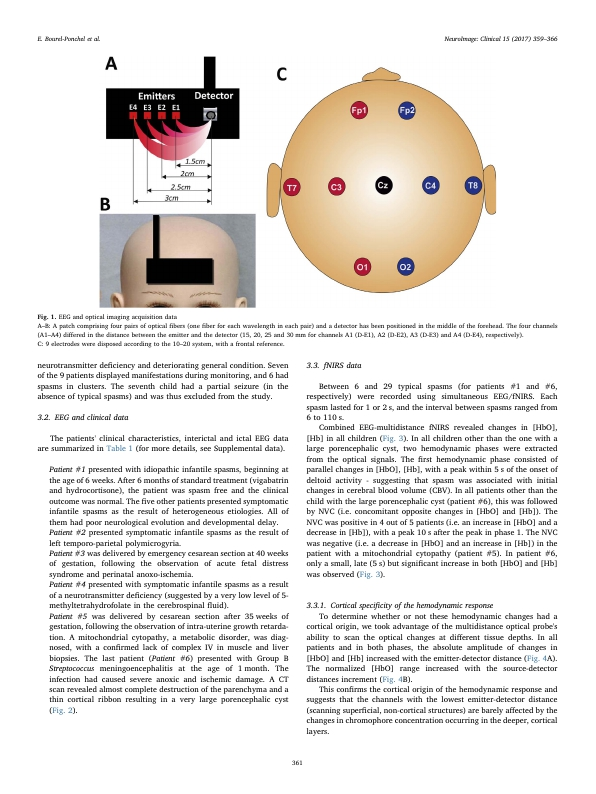

In [17]:
displayImage("/content/publaynet_sample.jpg")

Word Level Text Recognition Results

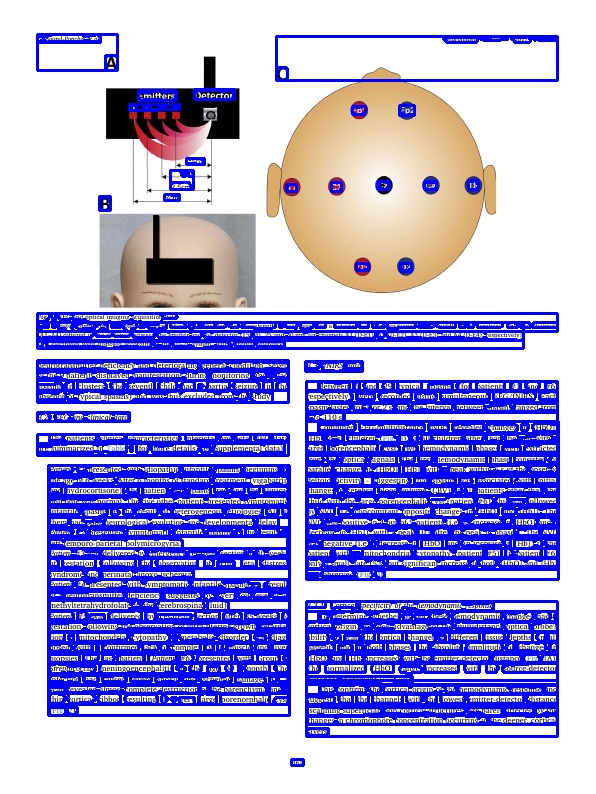

In [18]:
displayImage("/content/publaynet_sample-word.jpg")

Line Level Text Recognition Results

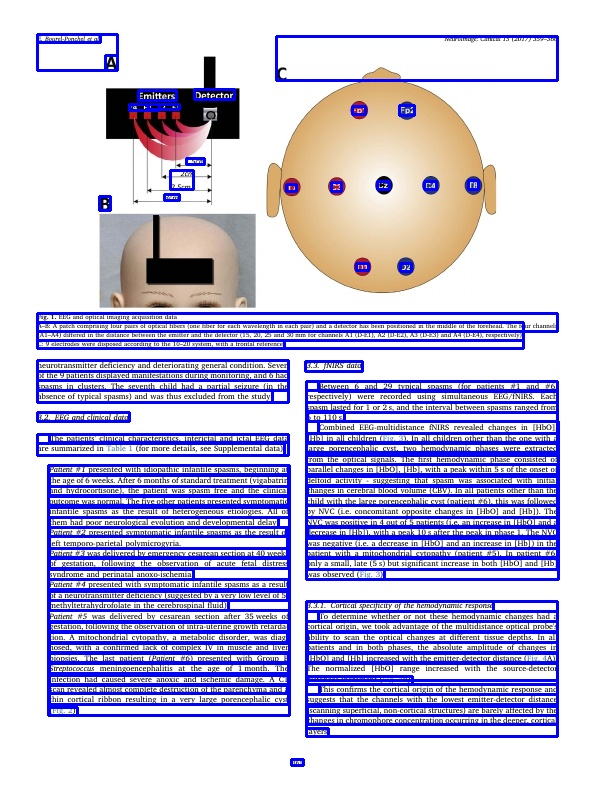

In [19]:
displayImage("/content/publaynet_sample-line.jpg")

Paragraph Level Text Recognition Results

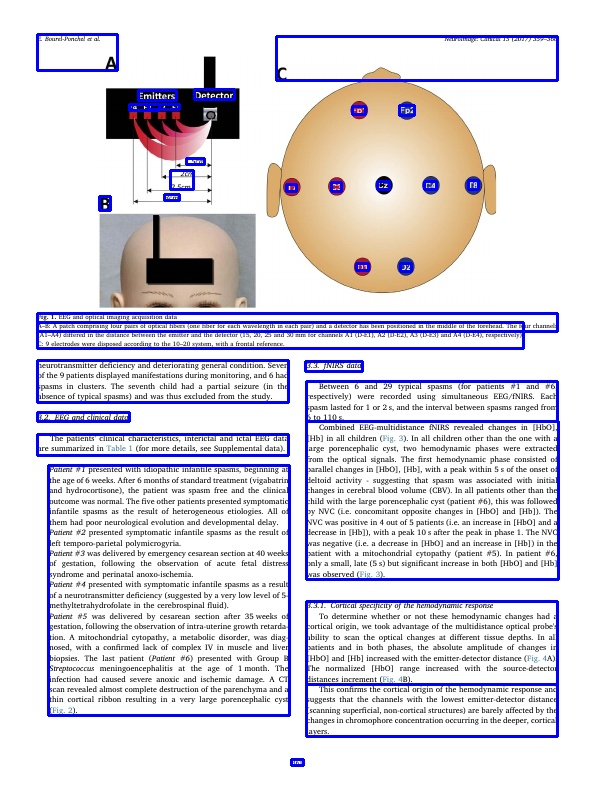

In [20]:
displayImage("/content/publaynet_sample-paragraph.jpg")